In [1]:
import pandas as pd
import numpy as np
import scipy
import pysr
import sympy
import math
from pysr import PySRRegressor
import matplotlib.pyplot as plt
import pickle

[juliapkg] Found dependencies: /home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/juliapkg.json
[juliapkg] Found dependencies: /home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/juliacall/juliapkg.json
[juliapkg] Found dependencies: /home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/juliapkg/juliapkg.json
[juliapkg] Locating Julia =1.10.0, ^1.10.3
[juliapkg] Querying Julia versions from https://julialang-s3.julialang.org/bin/versions.json
[juliapkg] WARNING: About to install Julia 1.11.5 to /home/ajt6830/.local/share/mamba/envs/pysr_env/julia_env/pyjuliapkg/install.
[juliapkg]   If you use juliapkg in more than one environment, you are likely to
[juliapkg]   have Julia installed in multiple locations. It is recommended to
[juliapkg]   install JuliaUp (https://github.com/JuliaLang/juliaup) or Julia
[juliapkg]   (https://julialang.org/downloads) yourself.
[juliapkg] Downloading Julia from https://julialang-s3

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
    Updating `~/.local/share/mamba/envs/pysr_env/julia_env/Project.toml`
  [6099a3de] + PythonCall v0.9.25
⌅ [8254be44] + SymbolicRegression v1.11.3
  [458c3c95] + OpenSSL_jll v3.5.1+0
  [9e88b42a] ~ Serialization ⇒ v1.11.0
    Updating `~/.local/share/mamba/envs/pysr_env/julia_env/Manifest.toml`
  [47edcb42] + ADTypes v1.15.0
  [79e6a3ab] + Adapt v4.3.0
  [66dad0bd] + AliasTables v1.1.3
  [4fba245c] + ArrayInterface v7.19.0
  [d360d2e6] + ChainRulesCore v1.25.2
  [bbf7d656] + CommonSubexpressions v0.3.1
  [34da2185] + Compat v4.17.0
  [992eb4ea] + CondaPkg v0.2.29
  [187b0558] + ConstructionBase v1.6.0
  [9a962f9c] + DataAPI v1.16.0
  [864edb3b] + DataStructures v0.18.22
  [e2d170a0] + DataValueInterfaces v1.0.0
  [163ba53b] + DiffResults v1.1.0
  [b552c78f] + DiffRules v1.15.1
  [a0c0ee7d] + DifferentiationInterface v0.7.1
  [8d63f2c5] + DispatchDoctor v0.4.22
  [ffbed154] + DocStringExtensio

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


In [2]:
pip install sxs

  Using cached sxs-2025.0.17-py3-none-any.whl.metadata (13 kB)
  Using cached bibtexparser-2.0.0b8-py3-none-any.whl.metadata (5.4 kB)
  Using cached h5py-3.14.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.7 kB)
  Using cached inflection-0.5.1-py2.py3-none-any.whl.metadata (1.7 kB)
  Using cached quaternionic-1.0.15-py3-none-any.whl.metadata (18 kB)
  Using cached spherical-1.0.16-py3-none-any.whl.metadata (7.7 kB)
  Using cached sxscatalog-3.0.15-py3-none-any.whl.metadata (1.6 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached pylatexenc-2.10-py3-none-any.whl
  Using cached spinsfast-2022.4.10-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (520 bytes)
Using cached sxs-2025.0.17-py3-none-any.whl (224 kB)
Using cached bibtexparser-2.0.0b8-py3-none-any.whl (39 kB)
Using cached h5py-3.14.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.5 MB)
Using cached inflection-0.5.1-py2.py3-none-any.whl (9.5 kB

In [3]:
import sxs
print(sxs.__file__)
print(sxs.__version__)
print(dir(sxs))

/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/sxs/__init__.py
2025.0.17
['Catalog', 'HorizonQuantities', 'Horizons', 'Metadata', 'Simulation', 'Simulations', 'TimeSeries', 'WaveformModes', 'WaveformModesDict', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', 'astronomical_unit', 'catalog', 'citation', 'cite', 'doi_prefix', 'doi_url', 'file_format', 'guvectorize', 'handlers', 'horizons', 'importlib_metadata', 'jit', 'lev_number', 'load', 'load_lvc', 'load_via_sxs_id', 'loadcontext', 'local_simulations', 'm_sun_in_meters', 'm_sun_in_seconds', 'metadata', 'parsec_in_meters', 'read_config', 'rpdmb', 'rpxmb', 'simulations', 'solar_mass_parameter', 'spectre_cce_v1', 'speed_of_light', 'sxs_directory', 'sxs_id', 'sxs_id_to_url', 'time_series', 'to_lvc_conventions', 'utilities', 'vectorize', 'version_info', 'waveforms', 'write_config', 'write_local_simulations', 'zenodo']


In [4]:
df = sxs.load("dataframe")

Loading SXS simulations using latest tag 'v3.0.0', published at 2025-05-14T18:17:30Z.


In [5]:
df_1 = df.loc[df['reference_eccentricity'] < 0.01]
df_2 = df_1.loc[df_1["reference_dimensionless_spin1_x"] < 0.001]
df_3 = df_2.loc[df_2["reference_dimensionless_spin2_x"] < 0.001]
df_4 = df_3.loc[df_3["reference_dimensionless_spin1_y"] < 0.001]
df_5 = df_4.loc[df_4["reference_dimensionless_spin2_y"] < 0.001]
df_6 = df_5.loc[df_5["deprecated"] == False]
df_7 = df_6.loc[np.isfinite(df_6["common_horizon_time"])]

print(len(df_7))

848


In [11]:
ID_num = 109
event = sxs.load(f"SXS:BBH:0{ID_num}", ignore_deprecation=True)
with pd.option_context("max_colwidth", 46, "display.max_rows", None, "display.large_repr", "truncate"):
    display(event.series)

deprecated                                                                      False
reference_mass_ratio                                                         5.002185
reference_chi_eff                                                           -0.416321
reference_chi1_perp                                                               0.0
reference_chi2_perp                                                               0.0
reference_eccentricity                                                       0.001107
reference_eccentricity_bound                                                 0.001107
reference_time                                                                  340.0
reference_dimensionless_spin1_x                                                   0.0
reference_dimensionless_spin1_y                                                  -0.0
reference_dimensionless_spin1_z                                             -0.499549
reference_dimensionless_spin1_mag                     

In [6]:
ref_orb_period = 2*np.pi/df_7["reference_orbital_frequency_mag"]
CHT = df_7["common_horizon_time"] - df_7["reference_time"]

In [7]:
def Newtonian_CHT(X):
    #tau is orbital period, q is mass_ratio, A is scaling constant based on fundamental mathematical and physical constants with G = C = 1
    A = 5/(16*np.pi)**(8/3)
    tau, q = X
    return A*tau**(8/3)*(q+1)**2/q

def nu(q):
    return q/(q+1)**2

In [8]:
default_pysr_params = dict(
    populations = 30,
    model_selection="best",
)

best_avg_error = 100

In [9]:
model = PySRRegressor(
    niterations=30,
    binary_operators=["+", "*", "-"],
    unary_operators=["square", "cube", "sqrt", "cbrt", "inv(x) = 1/x"], #"cube_root(x) = cbrt(x)"
    extra_sympy_mappings={"inv": lambda x: 1/x}, #"square": lambda x: x**2, "cube_root": lambda x: x**(1/3)
    **default_pysr_params,
    elementwise_loss="loss(prediction, target, w) = ((prediction - target)/w)^2"
    # ^ Custom loss function (julia syntax). It takes the difference of the Newtonian residual from the PySR estimation and weights it by the inverse
    #of the length of the original simulation
)

In [ ]:

#Here, we fit to the residuals between the Newtonian predictions for common horizon time and the common horizon times found by simulation. This model
#uses regular mass ratio as a parameter, and all plots are made with mass ratio q

num = 100
Newt_Residual = Newtonian_CHT([ref_orb_period, df_7["reference_mass_ratio"]]) - CHT
init_param = np.column_stack((ref_orb_period, df_7["reference_mass_ratio"], df_7["reference_dimensionless_spin1_z"], df_7["reference_dimensionless_spin2_z"]))

for i in range(num):
    model.fit(init_param, Newt_Residual, weights = CHT)
    Residual_pred = model.predict(init_param)
    current_avg_error = 100*np.sqrt(np.power((Newt_Residual - Residual_pred)/CHT, 2)).mean() 
    
    print("Current Prediction Average Error (%):", current_avg_error)
    print("Best Prediction Average Error (%):", best_avg_error)
    print("Current Model Formula:", model.sympy())
    plt.scatter(df_7["reference_mass_ratio"], 100*(Newt_Residual - Residual_pred)/CHT, marker = ".", label = "PySR")
    plt.xlabel("q")
    plt.ylabel("Error in CHT (%)")
    plt.title("Percent Residuals")

    if current_avg_error < best_avg_error:
        best_avg_error = current_avg_error
        plt.savefig(f"spin_model_{round(best_avg_error, 3)}.png")
        with open(f'spin_model_{round(best_avg_error, 3)}.pk', 'wb') as best_model_file: #We create a pickle file called 'best_model.pk' that we want to write into and call it best_model_file
            pickle.dump(model, best_model_file) #We write the current state of the model to the pickle file created above
    elif current_avg_error < 1.5*best_avg_error:
        plt.savefig(f"spin_model_{round(current_avg_error, 3)}.png")
        with open(f'spin_model_{round(current_avg_error, 3)}.pk', 'wb') as good_model_file:
            pickle.dump(model, good_model_file)

    plt.close()

/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!



Expressions evaluated per second: 9.050e+04
Progress: 670 / 900 total iterations (74.444%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           6.858e-06  0.000e+00  y = 706.17
3           4.194e-06  2.458e-01  y = x₁ * 231.57
5           3.027e-06  1.631e-01  y = x₀ * (x₁ - x₂)
6           2.764e-06  9.099e-02  y = x₀ * (x₁ - cbrt(x₂))
7           7.315e-07  1.329e+00  y = x₁ * (x₀ * (0.62086 - x₂))
9           3.672e-07  3.447e-01  y = (((0.6156 - x₂) * x₁) - x₃) * x₀
11          2.285e-07  2.371e-01  y = x₀ * (((x₁ * (0.49503 - x₂)) - x₃) + 0.55287)
13          1.515e-07  2.054e-01  y = x₀ * ((((x₂ + -0.67702) * -0.79846) * (x₁ - -0.80237))...
                                       - x₃)
15          1.364e-07  5.252e-02  y = (((x₂ + -0.6786) * ((x₁ - -0.92488) * -0.81358)) - x₃)...


[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250703_150100_DMZcNC/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           6.858e-06  0.000e+00  y = 705.88
3           4.194e-06  2.458e-01  y = x₁ * 231.54
5           3.027e-06  1.631e-01  y = x₀ * (x₁ - x₂)
6           2.764e-06  9.099e-02  y = (x₁ - cbrt(x₂)) * x₀
7           7.315e-07  1.329e+00  y = x₁ * ((0.62083 - x₂) * x₀)
9           3.671e-07  3.447e-01  y = x₀ * (((0.61396 - x₂) * x₁) - x₃)
11          2.294e-07  2.351e-01  y = x₀ * ((((0.50851 - x₂) * x₁) + 0.51006) - x₃)
12          1.902e-07  1.871e-01  y = x₀ * (((0.56484 - x₂) * (x₁ + inv(x₁))) - x₃)
13          1.898e-07  2.194e-03  y = x₀ * (((inv(square(x₁)) + x₁) * (0.58585 - x₂)) - x₃)
14          1.324e-07  3.600e-01  y = (((inv(x₁) + x₁) * (0.66639 - x₂)) - x₃) * (x₀ + -29.1...
                                      25)
16          1.139e-07  7.524e-02  y = (((inv(x₁) + x₁) * (0.674

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Current Prediction Average Error (%): 2.0625349290039523
Best Prediction Average Error (%): 2.227772955857522
Current Model Formula: (x0 - 29.124502)*(-x3 + (0.6663933 - x2)*(x1 + 1/x1))
  - outputs/20250703_150109_V4RAhV/hall_of_fame.csv


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           6.858e-06  0.000e+00  y = 706.05
3           4.194e-06  2.458e-01  y = x₁ * 231.57
5           3.027e-06  1.631e-01  y = (x₁ - x₂) * x₀
6           2.764e-06  9.099e-02  y = (x₁ - cbrt(x₂)) * x₀
7           7.315e-07  1.329e+00  y = ((0.62086 - x₂) * x₀) * x₁
9           3.671e-07  3.447e-01  y = x₀ * (((0.61396 - x₂) * x₁) - x₃)
11          2.285e-07  2.371e-01  y = x₀ * ((((0.49617 - x₂) * x₁) - x₃) + 0.54778)
13          2.223e-07  1.380e-02  y = ((((0.49617 - x₂) * x₁) - x₃) + 0.54778) * (x₀ - x₁)
15          2.086e-07  3.176e-02  y = ((x₁ * 0.48786) + ((0.5575 - x₃) - (x₂ * (x₁ - -0.2772...
                                      8)))) * x₀
17          1.079e-07  3.296e-01  y = (((0.70097 * x₁) - (x₃ - 0.54017)) - (x₂ * (x₁ - -0.99...
                                      842))) * (x₀ - 70.665)
19          1.075e-07  1.928e-03  y 

/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250703_150114_3uZk5F/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           6.858e-06  0.000e+00  y = 706.05
3           4.194e-06  2.458e-01  y = x₁ * 231.58
5           3.027e-06  1.631e-01  y = x₀ * (x₁ - x₂)
6           2.764e-06  9.099e-02  y = (x₁ - cbrt(x₂)) * x₀
7           7.315e-07  1.329e+00  y = (x₁ * (0.62086 - x₂)) * x₀
9           3.671e-07  3.447e-01  y = x₀ * ((x₁ * (0.61394 - x₂)) - x₃)
11          2.285e-07  2.370e-01  y = x₀ * ((((0.49416 - x₂) * x₁) + 0.55685) - x₃)
12          1.902e-07  1.833e-01  y = x₀ * (((0.56482 - x₂) * (x₁ + inv(x₁))) - x₃)
13          1.289e-07  3.895e-01  y = (x₀ + -52.303) * (((0.63158 - x₂) * (x₁ + 0.9977)) - x...
                                      ₃)
15          1.128e-07  6.639e-02  y = (x₀ + -55.68) * ((((0.65825 - x₂) * 0.95974) * (x₁ + 0...
                                      .98574)) - x₃)
20     

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Current Prediction Average Error (%): 2.141818964873399
Best Prediction Average Error (%): 1.8215411759552953
Current Model Formula: (x0 - 52.302753)*(-x3 + (0.63158053 - x2)*(x1 + 0.99770427))
  - outputs/20250703_150121_XCcnmb/hall_of_fame.csv


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           6.858e-06  0.000e+00  y = 706.24
3           4.194e-06  2.458e-01  y = x₁ * 231.58
5           3.027e-06  1.631e-01  y = x₀ * (x₁ - x₂)
6           2.764e-06  9.099e-02  y = x₀ * (x₁ - cbrt(x₂))
7           7.315e-07  1.329e+00  y = (x₀ * (0.62085 - x₂)) * x₁
9           5.636e-07  1.304e-01  y = x₀ * (((0.49451 - x₂) * x₁) - x₃)
10          4.812e-07  1.581e-01  y = (x₀ * (0.5723 - x₂)) * (inv(x₁) + x₁)
11          2.285e-07  7.446e-01  y = x₀ * (((0.49451 - x₂) * x₁) + (0.54706 - x₃))
13          2.178e-07  2.404e-02  y = (((0.53026 - x₂) * x₁) + (0.48956 - x₃)) * (x₀ - x₁)
15          2.144e-07  7.966e-03  y = ((((0.53026 - x₂) * x₁) + 0.48956) - x₃) * ((x₀ - x₁) ...
                                      - x₁)
17          2.124e-07  4.643e-03  y = (x₀ - ((0.53462 - x₂) * x₁)) * (0.47872 + (((0.53462 -...
                          

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(



Expressions evaluated per second: 1.410e+05
Progress: 848 / 900 total iterations (94.222%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           6.858e-06  0.000e+00  y = 706.27
3           4.194e-06  2.458e-01  y = x₁ * 231.56
5           3.027e-06  1.631e-01  y = (x₁ - x₂) * x₀
6           2.764e-06  9.099e-02  y = (x₁ - cbrt(x₂)) * x₀
7           7.315e-07  1.329e+00  y = x₁ * ((0.62087 - x₂) * x₀)
9           3.671e-07  3.447e-01  y = (((0.61396 - x₂) * x₁) - x₃) * x₀
11          2.304e-07  2.330e-01  y = ((x₁ * (0.51358 - x₂)) - (-0.51091 + x₃)) * x₀
13          2.175e-07  2.873e-02  y = (((0.52055 - x₂) * x₁) - (x₃ + -0.51674)) * (x₀ - x₁)
15          2.090e-07  1.998e-02  y = (x₀ - 8.0379) * ((((x₁ + 0.2604) * (0.51845 - x₂)) - x...
                                      ₃) - -0.5

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           6.858e-06  0.000e+00  y = 706.33
3           4.194e-06  2.458e-01  y = x₁ * 231.58
5           3.027e-06  1.631e-01  y = x₀ * (x₁ - x₂)
6           2.764e-06  9.099e-02  y = (x₁ - cbrt(x₂)) * x₀
7           7.315e-07  1.329e+00  y = (x₀ * (0.62086 - x₂)) * x₁
9           3.671e-07  3.447e-01  y = x₀ * (((0.61397 - x₂) * x₁) - x₃)
11          2.285e-07  2.371e-01  y = x₀ * (((x₁ * (0.49609 - x₂)) - x₃) - -0.54888)
13          1.644e-07  1.647e-01  y = ((x₃ - ((x₁ - -1.0086) * (0.63741 - x₂))) * x₀) * -0.8...
                                      0689
15          1.637e-07  2.099e-03  y = ((x₃ - ((x₁ - -1.0086) * (0.63741 - x₂))) * (x₀ + -0.8...
                                      0689)) * -0.80689
16          1.452e-07  1.201e-01  y = x₀ * (((inv(x₀) - (x₁ - -1.0603)) * ((0.63828 - x₂) * ...
                                      -0.

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:



Expressions evaluated per second: 1.500e+05
Progress: 859 / 900 total iterations (95.444%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           6.858e-06  0.000e+00  y = 706.28
3           4.194e-06  2.458e-01  y = x₁ * 231.57
5           3.027e-06  1.631e-01  y = x₀ * (x₁ - x₂)
6           2.764e-06  9.099e-02  y = x₀ * (x₁ - cbrt(x₂))
7           7.315e-07  1.329e+00  y = (0.62083 - x₂) * (x₀ * x₁)
9           3.671e-07  3.447e-01  y = x₀ * ((x₁ * (0.61397 - x₂)) - x₃)
11          2.322e-07  2.290e-01  y = ((x₁ * (0.5206 - x₂)) - (x₃ - 0.46538)) * x₀
13          1.436e-07  2.402e-01  y = (((0.59822 - x₂) * (x₁ - -0.68086)) - x₃) * (x₀ + -39....
                                      715)
15          1.291e-07  5.350e-02  y = (((x₁ - -0.68086) * (0.59822 - x₂)) - (x₃ - 0.12565)) ...
  

/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!


  - outputs/20250703_150144_RqItOL/hall_of_fame.csv

Expressions evaluated per second: 1.410e+05
Progress: 894 / 900 total iterations (99.333%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           6.858e-06  0.000e+00  y = 706.05
3           4.194e-06  2.458e-01  y = x₁ * 231.56
5           3.027e-06  1.631e-01  y = (x₁ - x₂) * x₀
6           2.764e-06  9.099e-02  y = (x₁ - cbrt(x₂)) * x₀
7           7.315e-07  1.329e+00  y = (x₀ * (0.62083 - x₂)) * x₁
9           3.679e-07  3.436e-01  y = ((x₁ * (0.62166 - x₂)) - x₃) * x₀
11          2.285e-07  2.382e-01  y = (((x₁ * (0.49636 - x₂)) - x₃) - -0.5475) * x₀
13          1.707e-07  1.459e-01  y = (x₀ * -0.84545) * (x₃ + ((-0.75886 - x₁) * (0.63595 - ...
                                      x₂)))
15          1.674e-07  9.665e-03  y = ((x₃ +

[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250703_150151_Y9OpK4/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           6.858e-06  0.000e+00  y = 706.29
3           4.194e-06  2.458e-01  y = x₁ * 231.56
5           3.027e-06  1.631e-01  y = x₀ * (x₁ - x₂)
6           2.764e-06  9.099e-02  y = x₀ * (x₁ - cbrt(x₂))
7           7.315e-07  1.329e+00  y = (0.62083 - x₂) * (x₁ * x₀)
9           3.671e-07  3.447e-01  y = x₀ * ((x₁ * (0.61397 - x₂)) - x₃)
11          2.285e-07  2.371e-01  y = ((((0.49629 - x₂) * x₁) - -0.54726) - x₃) * x₀
13          2.176e-07  2.431e-02  y = (x₀ - x₁) * ((((0.52812 - x₂) * x₁) + 0.49403) - x₃)
15          1.437e-07  2.076e-01  y = (((x₁ + (0.77383 - (x₁ * 0.21245))) * (0.66028 - x₂)) ...
                                      - x₃) * x₀
17          1.430e-07  2.342e-03  y = (((0.66028 - x₂) * (0.77383 + (x₁ - (x₁ * 0.21245)))) ...
                                      - x₃) 

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250703_150157_3fz8Fb/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           6.858e-06  0.000e+00  y = 706.2
3           4.194e-06  2.458e-01  y = x₁ * 231.56
5           3.027e-06  1.631e-01  y = x₀ * (x₁ - x₂)
6           2.764e-06  9.099e-02  y = (x₁ - cbrt(x₂)) * x₀
7           7.433e-07  1.313e+00  y = x₀ * (x₁ * (0.65008 - x₂))
9           4.820e-07  2.166e-01  y = (x₂ - 0.62048) * ((x₃ - x₁) * x₀)
11          2.723e-07  2.856e-01  y = x₀ * (((-0.32657 - x₁) * (x₂ - 0.56931)) - x₃)
13          1.470e-07  3.083e-01  y = (((-0.87503 - x₁) * ((x₂ - 0.65081) * 0.81553)) - x₃) ...
                                      * x₀
15          1.456e-07  4.799e-03  y = ((((-1.1011 - x₁) * ((x₂ - 0.67292) * 0.76012)) - x₃) ...
                                      * x₀) - x₂
17          1.449e-07  2.215e-03  y = ((((x₂ - 0.63975) * 0.8202) * (-0.87088 - x₁)) - x₃) *.

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!


  - outputs/20250703_150203_5oqywx/hall_of_fame.csv
Current Prediction Average Error (%): 2.095189939287716
Best Prediction Average Error (%): 1.8215411759552953
Current Model Formula: x0*(-x3 + (0.51613575 - 0.78678566*x2)*(x1 + 1.009091))


[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sy

Current Prediction Average Error (%): 2.0659163308786654
Best Prediction Average Error (%): 1.8215411759552953
Current Model Formula: (x0 - 59.88122)*(-x3 + (0.67620933 - x2)*(x1 + 0.73085225))


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Current Prediction Average Error (%): 2.0449880280125075
Best Prediction Average Error (%): 1.8215411759552953
Current Model Formula: (x0 - 1*23.440147)*(-x3 + (0.6522106 - x2)*(-0.12757841*x1 + x1 + 0.7667311))


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Current Prediction Average Error (%): 2.137519417566518
Best Prediction Average Error (%): 1.8215411759552953
Current Model Formula: x0*(-x3 + (-x1 - 1.0687667)*(x2*0.7730337 - 1*0.5089147)) - (x1 + x3)


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Current Prediction Average Error (%): 2.1141517088583366
Best Prediction Average Error (%): 1.8215411759552953
Current Model Formula: (x0 - 1*69.16492)*(-x3 + (0.6811802 - x2)*(x1 - 1*(-0.92053765)))


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Current Prediction Average Error (%): 2.063229689044101
Best Prediction Average Error (%): 1.8215411759552953
Current Model Formula: x0*(-x3 + (0.6259267 - x2)*(x1 + 1/x1)*0.9266015)


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Current Prediction Average Error (%): 2.4104765178880343
Best Prediction Average Error (%): 1.8215411759552953
Current Model Formula: x0*(x2**3 - (x3 - 0.87079614*(0.57486874 - x2)*(x1 - 1*(-1.1378067))))


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Current Prediction Average Error (%): 2.0487733159339436
Best Prediction Average Error (%): 1.8215411759552953
Current Model Formula: (62.7906 - x0)*(x3 + (0.65950227 - x2)*(-x1 - 0.922795))


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Current Prediction Average Error (%): 2.058051626727603
Best Prediction Average Error (%): 1.8215411759552953
Current Model Formula: x0*(-x3 + (x1 + 0.89518744)*(x2*(-0.8292903) - 1*(-0.52579755)))


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Current Prediction Average Error (%): 2.020308533621869
Best Prediction Average Error (%): 1.8215411759552953
Current Model Formula: (x0 - 1*60.151627)*(-x3 + (0.65926594 - x2)*(x1 - 1*(-0.8464105)))


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Current Prediction Average Error (%): 2.2759076172879324
Best Prediction Average Error (%): 1.8215411759552953
Current Model Formula: x0*(x1 - x3 + (-x2 - 0.55697536)*(x1*0.921583 + 0.52547777) + 0.8692176)


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Current Prediction Average Error (%): 2.0394694233608077
Best Prediction Average Error (%): 1.8215411759552953
Current Model Formula: (x0 - 62.287495)*(-x3 + (0.666988 - x2)*(x1 + 0.83711493))


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Current Prediction Average Error (%): 2.0338049266767877
Best Prediction Average Error (%): 1.8215411759552953
Current Model Formula: (x0 - 62.119144)*(-x3 + (0.65541965 - x2)*(x1 + 0.9041269))


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Current Prediction Average Error (%): 2.2474163638085103
Best Prediction Average Error (%): 1.8215411759552953
Current Model Formula: x0*(-x3 + (0.5652744 - x2)*(x1 + 1/x1))


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Current Prediction Average Error (%): 2.0659249010775715
Best Prediction Average Error (%): 1.8215411759552953
Current Model Formula: (x0 - 42.577225)*(-x3 + (0.6764746 - x2)*(x1 + 1/x1))


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Current Prediction Average Error (%): 2.0226833752115243
Best Prediction Average Error (%): 1.8215411759552953
Current Model Formula: (x0 - 1.0931121*32.328312)*(-x3 + (0.649668 - x2)*(x1 + 1/x1))


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:1270: UserWarning: `extra_sympy_mappings` cannot be pickled and will be removed from the serialized instance. When loading the model, please redefine `extra_sympy_mappings` at runtime.
  warnings.warn(warn_msg)
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Current Prediction Average Error (%): 2.0874849706325853
Best Prediction Average Error (%): 1.8215411759552953
Current Model Formula: x0*(-x3 + (0.65228665 - x2)*(x1 - 1*(-0.99303))*0.7919869)


/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           6.858e-06  0.000e+00  y = 706.33
3           6.561e-06  2.209e-02  y = x₀ * 2.2337
4           4.559e-06  3.641e-01  y = inv(x₁ * 0.0068738)
6           3.551e-06  1.250e-01  y = square(x₂ - 1.3743) * x₀
7           3.342e-06  6.071e-02  y = ((x₂ * 538.77) - x₀) * -2.0854
8           3.264e-06  2.352e-02  y = x₀ * (square(x₂ - 1.3612) - x₃)
9           2.237e-06  3.780e-01  y = square(x₂ - cube(1.3743 - x₁)) * x₀
10          1.941e-06  1.417e-01  y = (0.43094 - x₂) * square(x₀ * (x₁ - 0.28368))
11          1.310e-06  3.930e-01  y = x₀ * (cube(square(x₁ - 1.419)) * (0.66405 - x₂))
12          7.745e-07  5.258e-01  y = x₀ * square(x₂ - square(x₁ - square(x₁ - 1.3612)))
14          4.561e-07  2.647e-01  y = x₀ * (square(x₂ - square(x₁ - square(x₁ - 1.3612))) - ...
                                      x₃)
16          2.325e-07  3.369e-0

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:


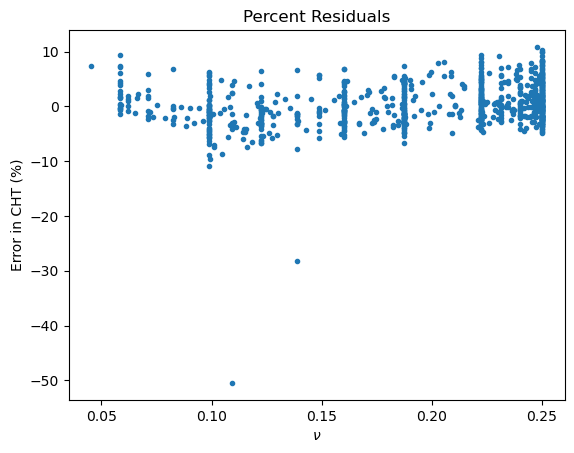

/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250703_142127_ePjXSv/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           6.858e-06  0.000e+00  y = 706.05
3           6.561e-06  2.209e-02  y = x₀ * 2.2337
4           5.478e-06  1.805e-01  y = inv(x₁ * 0.010583)
5           3.282e-06  5.123e-01  y = (0.62212 - x₂) * 1105.9
7           3.272e-06  1.505e-03  y = ((x₂ * -1.7052) - -1.0124) * 684.81
9           2.459e-06  1.427e-01  y = square(square((x₁ + -1.7917) * (x₂ - 3.1998)))
11          2.052e-06  9.068e-02  y = square(square((x₁ + -1.3184) * (x₂ - 5.0534))) - x₀
12          8.956e-07  8.288e-01  y = cube((x₂ * -0.08637) + (0.35641 - x₁)) * (x₀ * x₀)
14          5.682e-07  2.275e-01  y = x₀ * ((x₀ * cube((0.35263 + (x₂ * -0.083888)) - x₁)) -...
                                       x₃)
16          4.573e-07  1.085e-01  y = x₀ * ((x₁ + (cube((0.34919 - x₁) + (x₂ * -0.090305)) *...
                  

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:


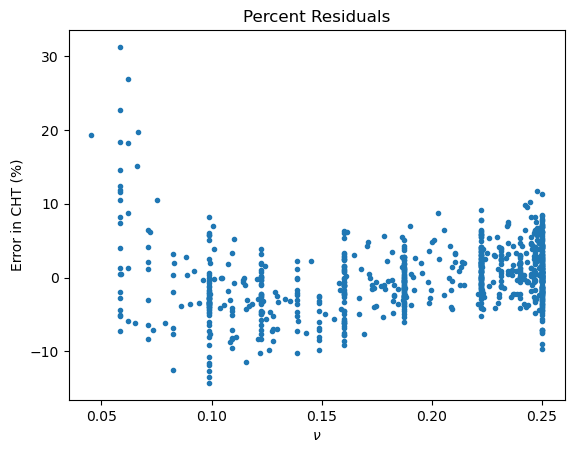

/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250703_142133_33y1Kc/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           6.858e-06  0.000e+00  y = 706.28
3           6.561e-06  2.209e-02  y = x₀ * 2.2337
4           4.559e-06  3.641e-01  y = inv(x₁) * 145.44
5           3.276e-06  3.306e-01  y = (0.60893 - x₂) * 1129.7
7           2.824e-06  7.412e-02  y = ((0.77419 - x₂) - x₁) * 1206.2
8           2.266e-06  2.204e-01  y = (x₀ * inv(x₁)) * (0.45595 - x₂)
9           1.532e-06  3.912e-01  y = square((x₂ - 1.6882) * (inv(x₁) + 10.115))
10          4.771e-07  1.167e+00  y = (-2.1421 + inv(x₁)) * ((0.59191 - x₂) * x₀)
12          1.744e-07  5.030e-01  y = (((inv(x₁) + -2.1421) * (0.59191 - x₂)) - x₃) * x₀
14          1.601e-07  4.290e-02  y = (((0.60027 - x₂) * (inv(x₁) + -2.1616)) - x₃) * (x₀ - ...
                                      4.8642)
15          1.486e-07  7.446e-02  y = (((0.60027 - x₂) * (-2

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:


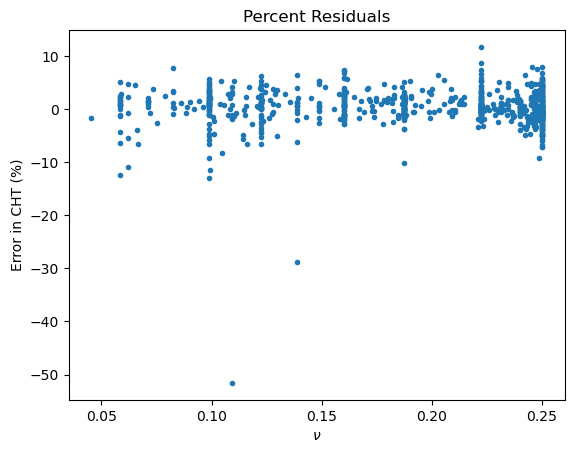

/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250703_142138_CdHmop/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           6.858e-06  0.000e+00  y = 706.33
3           6.561e-06  2.209e-02  y = x₀ * 2.2337
4           4.559e-06  3.641e-01  y = inv(x₁) * 145.46
6           3.803e-06  9.063e-02  y = (inv(x₁) - x₂) * 150.81
7           2.280e-06  5.117e-01  y = inv(x₁) * cube(5.2416 - x₂)
8           1.835e-06  2.172e-01  y = cube(5.1922 - cbrt(x₂)) * inv(x₁)
9           1.327e-06  3.243e-01  y = inv(x₁) * cube((4.9299 - x₂) - x₂)
10          1.230e-06  7.588e-02  y = inv(x₁) * cube((4.8479 - x₂) - cbrt(x₂))
11          1.145e-06  7.110e-02  y = inv(x₁) * cube(((4.8479 - x₂) - x₂) - x₃)
12          1.087e-06  5.254e-02  y = inv(x₁) * cube((4.829 - x₂) - (x₃ + cbrt(x₂)))
13          1.048e-06  3.612e-02  y = inv(x₁) * cube(4.8479 - (x₂ + (cube(x₃) + cbrt(x₂))))
14          1.027e-06  2.045e-02  y = inv(x₁) 

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:


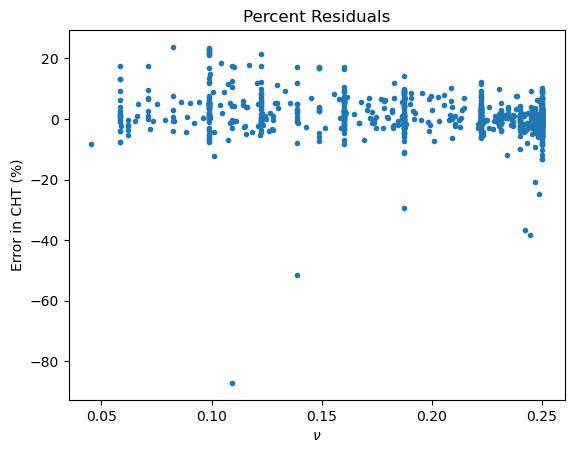

/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250703_142144_NqF6KW/hall_of_fame.csv


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:



Expressions evaluated per second: 1.230e+05
Progress: 730 / 900 total iterations (81.111%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           6.858e-06  0.000e+00  y = 706.29
3           6.561e-06  2.209e-02  y = x₀ * 2.2337
4           4.561e-06  3.637e-01  y = inv(x₁ * 0.0069766)
5           4.223e-06  7.694e-02  y = square(square(x₂ + -5.2961))
6           3.307e-06  2.444e-01  y = square((x₂ + -1.0584) * 22.83)
8           2.786e-06  8.581e-02  y = square(20.897 * (-1.3585 + (x₁ + x₂)))
9           2.200e-06  2.359e-01  y = square((inv(x₁) * (x₂ + -1.2162)) * 2.8496)
10          1.555e-06  3.470e-01  y = (square(cbrt(inv(x₁)) - x₂) * x₀) - x₀
11          1.315e-06  1.680e-01  y = square((inv(x₁) + 2.7442) * (2.8218 - (x₂ + x₂)))
12          8.376e-07  4.508e-01  y = square((inv(x

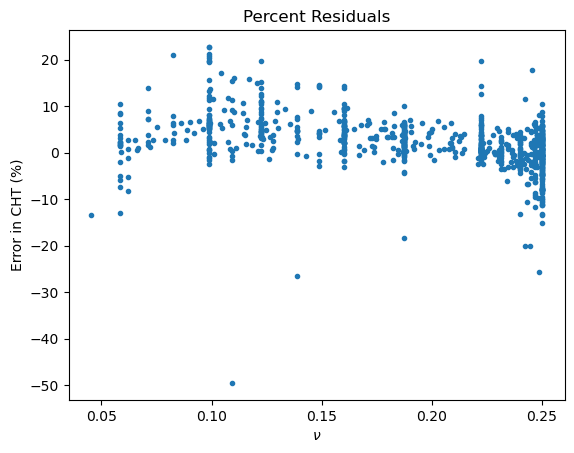

/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250703_142150_wPTW9j/hall_of_fame.csv

Expressions evaluated per second: 1.580e+05
Progress: 857 / 900 total iterations (95.222%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           6.858e-06  0.000e+00  y = 706.29
3           6.561e-06  2.209e-02  y = x₀ * 2.2337
4           4.792e-06  3.143e-01  y = inv(x₁ * 0.0083461)
5           3.272e-06  3.814e-01  y = (0.59651 - x₂) * 1152.1
7           3.258e-06  2.277e-03  y = (0.58083 - x₂) * (x₀ + 850.47)
8           3.213e-06  1.379e-02  y = square((x₃ + -22.216) * (x₂ - 1.0819))
9           1.535e-06  7.387e-01  y = square((inv(x₁) + 10.523) * (1.6483 - x₂))
11          1.063e-06  1.838e-01  y = cube(sqrt(inv(x₁)) - x₂) * (cbrt(x₀) * 6.9126)
12          1.051e-06  1.116e-02  y = cbrt(x₀) * (cube(sqrt(inv(x₁)) - cbrt(x₂)) * 6.

[ Info: Started!
[ Info: Final population:


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           6.858e-06  0.000e+00  y = 706.29
3           6.561e-06  2.209e-02  y = x₀ * 2.2337
4           4.792e-06  3.143e-01  y = inv(x₁ * 0.0083461)
5           3.272e-06  3.814e-01  y = (0.59651 - x₂) * 1152.1
7           3.258e-06  2.277e-03  y = (0.58083 - x₂) * (x₀ + 850.47)
8           3.213e-06  1.379e-02  y = square((x₃ + -22.216) * (x₂ - 1.0819))
9           1.534e-06  7.392e-01  y = square((inv(x₁) + 10.512) * (1.6419 - x₂))
11          1.063e-06  1.835e-01  y = cube(sqrt(inv(x₁)) - x₂) * (cbrt(x₀) * 6.9126)
12          8.844e-07  1.838e-01  y = cube(inv(sqrt(x₁)) - x₂) * (cbrt(x₀) * cbrt(x₀))
14          8.838e-07  3.162e-04  y = cube(sqrt(inv(x₁)) - x₂) * ((cbrt(x₀) * cbrt(x₀)) + x₁...
                                      )
16          8.787e-07  2.908e-03  y = cube(sqrt(inv(x₁)) - x₂) * ((cbrt(x₀) * cbrt(x₀)) + (-...
           

[ Info: Results saved to:


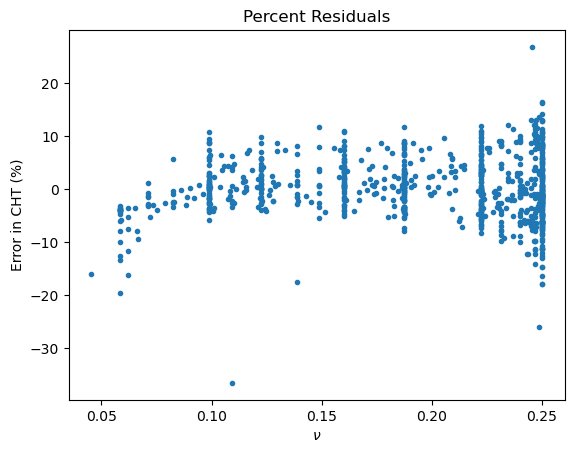

/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250703_142158_q4Jwvf/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           6.858e-06  0.000e+00  y = 706.2
3           6.561e-06  2.209e-02  y = x₀ * 2.2334
4           4.559e-06  3.641e-01  y = inv(x₁) * 145.45
5           3.272e-06  3.317e-01  y = (0.59272 - x₂) * 1159.3
7           3.270e-06  2.321e-04  y = ((0.59249 - x₂) * 1159.3) - x₃
8           1.097e-06  1.093e+00  y = (inv(x₁) * (0.66185 - x₂)) * 192.36
10          7.393e-07  1.972e-01  y = ((inv(x₁) * 0.63029) * (0.63525 - x₂)) * x₀
12          4.783e-07  2.177e-01  y = (((inv(x₁) * 0.60956) * (0.65197 - x₂)) - x₃) * x₀
14          2.045e-07  4.248e-01  y = (((inv(x₁) * (0.72974 - x₁)) * (0.71928 - x₂)) - x₃) *...
                                       x₀
16          1.569e-07  1.325e-01  y = (((inv(x₁) * (0.6048 - x₁)) * ((0.66596 - x₂) * 1.3463...
                                      )) - x₃)

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:


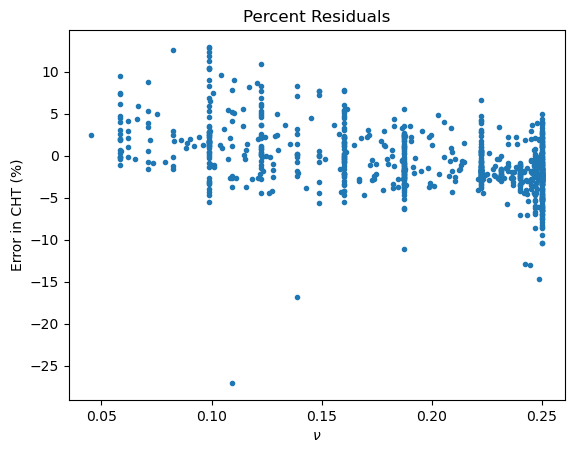

/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250703_142204_u6yeWn/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           6.858e-06  0.000e+00  y = 706.33
3           6.561e-06  2.209e-02  y = x₀ * 2.2337
4           5.510e-06  1.746e-01  y = cube(9.0709 - x₂)
5           3.657e-06  4.101e-01  y = cube(square(x₂ - 2.7209))
7           2.954e-06  1.067e-01  y = cube(square((2.9269 - x₂) - x₁))
9           1.606e-06  3.046e-01  y = square(cube((cbrt(inv(x₁)) - x₂) + 0.916))
11          1.214e-06  1.400e-01  y = square(square(((2.512 - x₂) * inv(cbrt(x₁))) - -0.4266...
                                      6))
12          1.169e-06  3.786e-02  y = cube(square(cbrt(x₂ + 1.3989) + (cbrt(inv(x₁)) - x₂)))
14          1.158e-06  4.662e-03  y = cube(square(cbrt(x₂ + 1.4183) + (cbrt(inv(x₁)) - x₂)))...
                                       - 19.547
16          1.093e-06  2.859e-02  y = square(cube(cbrt(x₂ + 1.3

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:


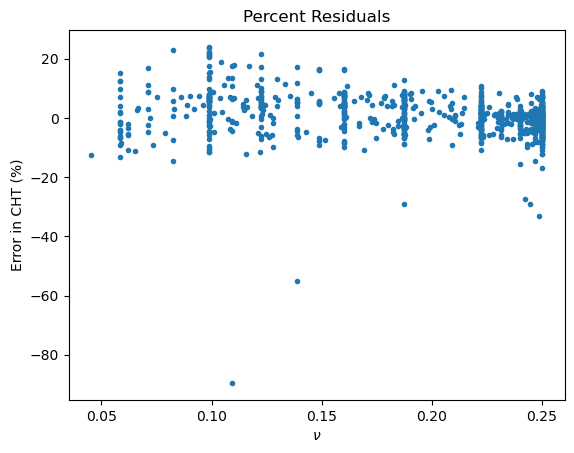

/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250703_142210_IWhfnb/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           6.858e-06  0.000e+00  y = 706.05
3           6.561e-06  2.209e-02  y = x₀ * 2.2339
4           4.559e-06  3.641e-01  y = inv(x₁) * 145.47
5           3.276e-06  3.306e-01  y = (0.56847 - x₂) * 1207.3
7           3.274e-06  2.271e-04  y = ((0.56847 - x₂) * 1207.3) - x₃
8           1.925e-06  5.311e-01  y = ((0.35752 - x₂) * inv(x₁)) * x₀
9           1.338e-06  3.635e-01  y = (0.40426 - cube(x₂)) * (inv(x₁) * x₀)
10          4.766e-07  1.033e+00  y = (inv(x₁) + -2.1092) * ((0.5885 - x₂) * x₀)
12          1.763e-07  4.974e-01  y = x₀ * (((0.57845 - x₂) * (inv(x₁) + -2.1108)) - x₃)
14          1.234e-07  1.781e-01  y = (x₀ - 28.599) * (((0.66409 - x₂) * (-2.0949 + inv(x₁))...
                                      ) - x₃)
16          1.119e-07  4.903e-02  y = (((inv(x₁) + -2.0979) * (0.6

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:


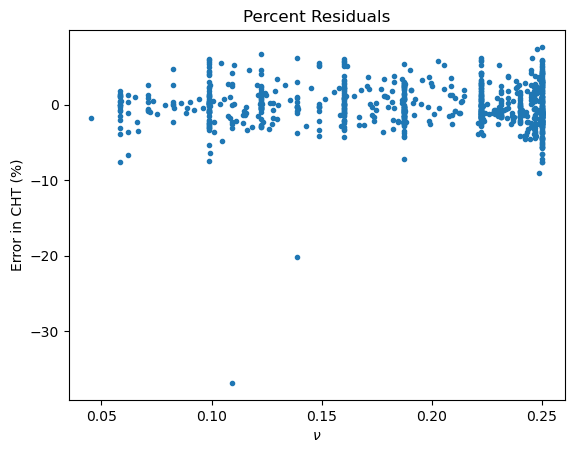

/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250703_142216_BvaWC3/hall_of_fame.csv

Expressions evaluated per second: 1.470e+05
Progress: 874 / 900 total iterations (97.111%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           6.858e-06  0.000e+00  y = 706.28
3           6.561e-06  2.209e-02  y = x₀ * 2.2337
4           4.559e-06  3.641e-01  y = inv(x₁) * 145.46
5           3.657e-06  2.206e-01  y = cube(square(2.7209 - x₂))
6           3.300e-06  1.027e-01  y = 488.47 * square(1.0931 - x₂)
8           3.033e-06  4.203e-02  y = x₀ * square((x₁ + x₂) + -1.5896)
9           2.692e-06  1.194e-01  y = cube(inv(x₁ * (x₂ - -1.461))) + x₀
10          2.557e-06  5.163e-02  y = square(x₂ + (x₁ + (x₁ - 1.8))) * x₀
11          1.854e-06  3.211e-01  y = square(cube(x₂ + -4.1139) * inv(cube(x₁ + 1.2207)))
13          1.683e-06  

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:


Current Prediction Average Error (%): 3.4740694409352546
Best Prediction Average Error (%): 100
Current Model Formula: -0.177687844036983*x0*(x3 + (-x1 - x2 + 0.8252064)*(-3.3944643))/x1 - 1.543209


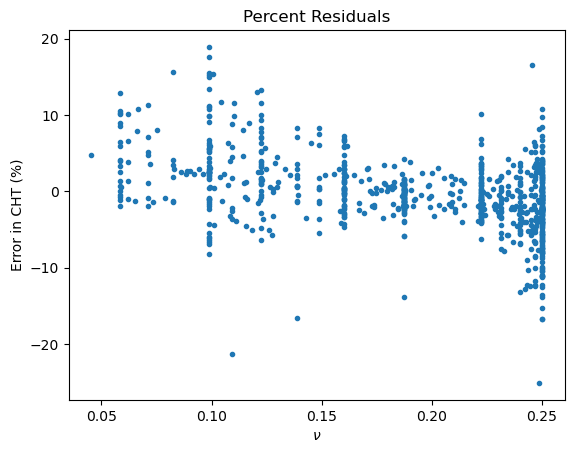

  - outputs/20250703_142222_O3fEAs/hall_of_fame.csv


In [11]:

#Here, we fit to the residuals between the Newtonian predictions for common horizon time and the common horizon times found by simulation. This time,
#however, symmetric mass ratio is used as a parameter to generate the model and plots instead of regular mass ratio
init_param = np.column_stack((ref_orb_period, nu(df_7["reference_mass_ratio"]), df_7["reference_dimensionless_spin1_z"], df_7["reference_dimensionless_spin2_z"]))
num = 10

for i in range(num):
    model.fit(init_param, Newt_Residual, weights = CHT)
    Residual_pred = model.predict(init_param)
    current_avg_error = 100*np.sqrt(np.power((Newt_Residual - Residual_pred)/CHT, 2)).mean() 
    
    print("Current Prediction Average Error (%):", current_avg_error)
    print("Best Prediction Average Error (%):", best_avg_error)
    print("Current Model Formula:", model.sympy())
    plt.scatter(nu(df_7["reference_mass_ratio"]), 100*(Newt_Residual - Residual_pred)/CHT, marker = ".", label = "PySR")
    plt.xlabel(r"$\nu$")
    plt.ylabel("Error in CHT (%)")
    plt.title("Percent Residuals")
    plt.show()
    plt.close()

/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.987e-05  0.000e+00  y = 3213.6
3           2.194e-05  2.986e-01  y = x₀ * 10.679
4           1.239e-05  5.718e-01  y = square(x₀ * 0.17736)
6           1.010e-05  1.019e-01  y = square((x₀ * 0.17626) + x₁)
7           8.553e-06  1.665e-01  y = square(x₀ + square(x₁)) * 0.029228
8           4.347e-06  6.768e-01  y = x₀ * ((square(x₀) * 6.5599e-05) + x₁)
10          3.177e-06  1.568e-01  y = ((square(x₀) * 6.5599e-05) + (x₁ + x₂)) * x₀
11          2.978e-06  6.440e-02  y = x₀ * (((6.5599e-05 * square(x₀)) + cbrt(x₂)) + x₁)
12          2.586e-06  1.412e-01  y = x₀ * ((square(x₀) * 6.5599e-05) + ((x₁ + x₂) + x₂))
13          2.574e-06  4.553e-03  y = ((x₀ * 0.054967) + (((x₂ + x₁) + x₂) - 10.88)) * x₀
14          2.515e-06  2.357e-02  y = (((cbrt(x₂) + x₁) + (x₂ + (x₀ * 0.055921))) - 11.233) ...
                                      * 

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:


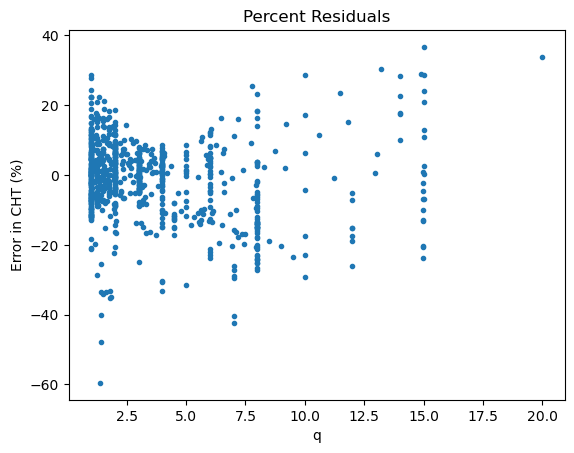

/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250703_142229_RadRm4/hall_of_fame.csv


[ Info: Started!



Expressions evaluated per second: 1.580e+05
Progress: 840 / 900 total iterations (93.333%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.987e-05  0.000e+00  y = 3213.3
3           2.194e-05  2.986e-01  y = x₀ * 10.679
4           1.239e-05  5.718e-01  y = square(x₀) * 0.03146
5           1.227e-05  9.466e-03  y = cube(sqrt(x₀ + -104.71))
6           1.010e-05  1.944e-01  y = square(x₁ + (x₀ * 0.17626))
8           7.730e-06  1.338e-01  y = sqrt(cube((x₀ + -118.94) + square(x₁)))
10          6.414e-06  9.334e-02  y = cube(x₂ + sqrt((square(x₁) + x₀) + -118.94))
11          3.877e-06  5.034e-01  y = square((cbrt(x₀ * (2.0206 + x₁)) * x₀) * 0.015245)
13          1.863e-06  3.664e-01  y = square(((x₀ * 0.015978) + x₂) * cbrt(x₀ * (x₁ + 1.8151...
                                   

[ Info: Final population:
[ Info: Results saved to:


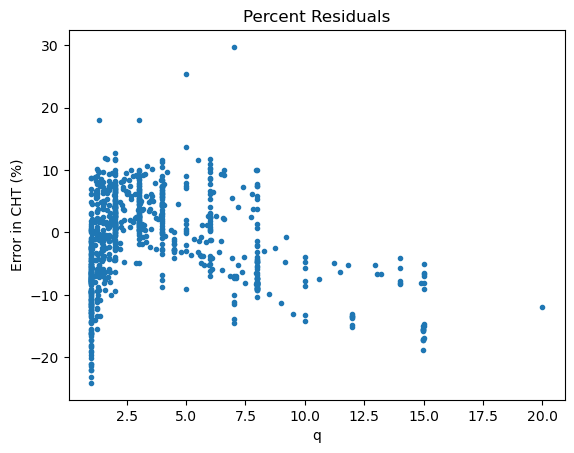

/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250703_142235_7AJmRB/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.987e-05  0.000e+00  y = 3213.4
3           2.194e-05  2.986e-01  y = x₀ * 10.679
4           1.308e-05  5.171e-01  y = cube(x₀) * 8.1826e-05
5           1.227e-05  6.409e-02  y = cube(sqrt(x₀ - 104.72))
6           1.209e-05  1.512e-02  y = (cube(x₀) * 7.5026e-05) + x₀
7           4.833e-06  9.166e-01  y = cbrt(x₁) * (cube(x₀) * 6.622e-05)
8           3.647e-06  2.817e-01  y = ((x₁ * 1.1774e-05) - -5.5543e-05) * cube(x₀)
10          2.025e-06  2.942e-01  y = (((x₂ + x₁) - -4.9153) * cube(x₀)) * 1.1702e-05
16          2.006e-06  1.503e-03  y = (cube(x₁) + cube(cbrt((cbrt(x₁) * cube(x₀)) * 6.0843e-...
                                      05) + x₂)) + x₀
17          2.004e-06  9.938e-04  y = x₀ + cube(x₂ + cbrt((6.0843e-05 * cube(x₁ + (x₁ + x₀))...
                                  

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:


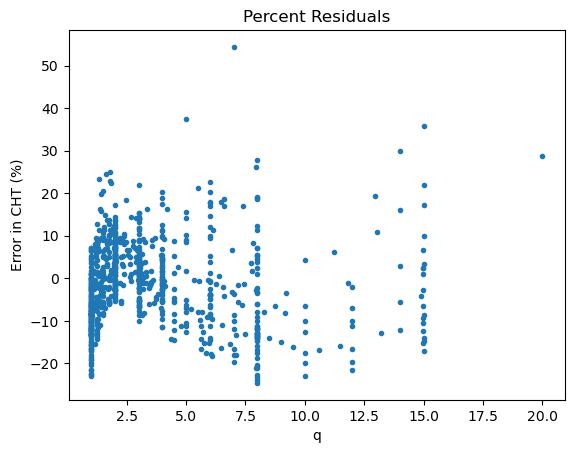

/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!


  - outputs/20250703_142241_fC7EEN/hall_of_fame.csv

Expressions evaluated per second: 1.630e+05
Progress: 857 / 900 total iterations (95.222%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.987e-05  0.000e+00  y = 3213.4
3           2.194e-05  2.986e-01  y = x₀ * 10.679
4           1.239e-05  5.718e-01  y = square(x₀ * 0.17737)
5           1.227e-05  9.465e-03  y = cube(sqrt(x₀ - 104.68))
6           1.108e-05  1.021e-01  y = cube((x₀ * 0.035488) - -3.0415)
7           4.833e-06  8.296e-01  y = (cbrt(x₁) * 6.622e-05) * cube(x₀)
8           3.919e-06  2.097e-01  y = cube((x₀ * 0.039962) + (0.51383 * x₁))
10          1.952e-06  3.484e-01  y = cube((x₀ * 0.039962) + ((x₁ * 0.51383) + x₂))
12          1.931e-06  5.452e-03  y = cube((((x₀ + 0.40648) * 0.039962) + (x₁ * 0.51383)) + .

[ Info: Final population:
[ Info: Results saved to:


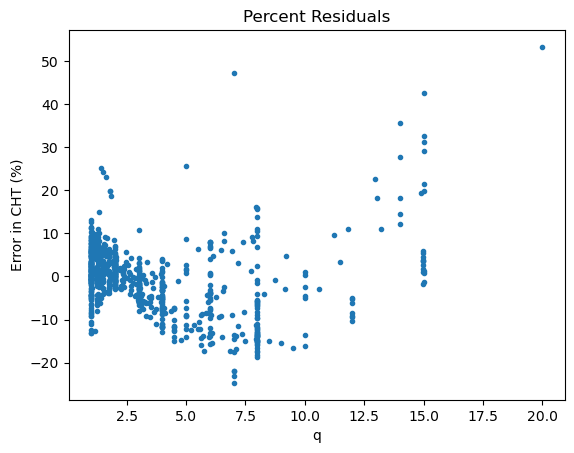

/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250703_142248_OjlId3/hall_of_fame.csv

Expressions evaluated per second: 1.360e+05
Progress: 893 / 900 total iterations (99.222%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.987e-05  0.000e+00  y = 3213.1
3           2.194e-05  2.986e-01  y = x₀ * 10.679
4           1.239e-05  5.718e-01  y = square(x₀) * 0.031462
5           1.227e-05  9.466e-03  y = sqrt(cube(x₀ + -104.71))
6           9.473e-06  2.588e-01  y = square(x₁ + (x₀ * 0.17029))
7           9.068e-06  4.370e-02  y = cube(x₁) + (cube(x₀) * 8.0284e-05)
8           6.855e-06  2.798e-01  y = cbrt(x₁) * cube(sqrt(x₀ + -131.56))
9           6.548e-06  4.585e-02  y = sqrt(cube(sqrt(cbrt(x₁)) * (x₀ + -131.56)))
10          5.865e-06  1.101e-01  y = cube((sqrt(x₁) + sqrt(x₀ + -146.34)) + x₂)
11          4.575e

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:


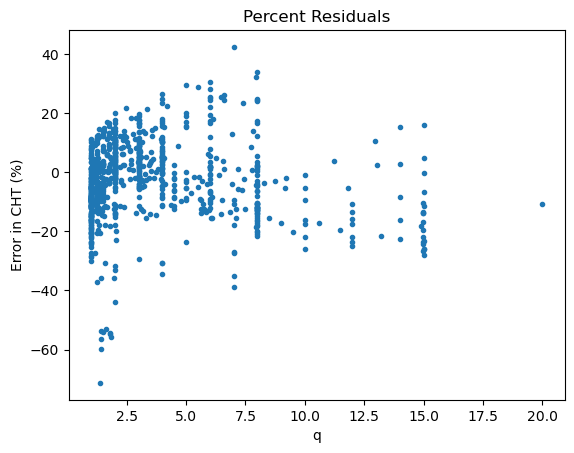

/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250703_142254_4A5lsv/hall_of_fame.csv


[ Info: Started!


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.987e-05  0.000e+00  y = 3213.3
3           2.194e-05  2.986e-01  y = x₀ * 10.679
4           1.239e-05  5.718e-01  y = square(x₀ * 0.17736)
5           1.227e-05  9.466e-03  y = sqrt(cube(x₀ + -104.71))
6           9.473e-06  2.588e-01  y = square((x₀ * 0.17026) + x₁)
7           6.390e-06  3.937e-01  y = cbrt(x₁) * cube(0.041821 * x₀)
8           3.943e-06  4.828e-01  y = cube(((x₀ * 0.08102) + x₁) * 0.4999)
10          1.840e-06  3.810e-01  y = cube(x₂ + (((x₀ * 0.08102) + x₁) * 0.4999))
12          1.542e-06  8.846e-02  y = cube(((x₃ + (x₁ + (x₀ * 0.08118))) * 0.4999) + x₂)
14          1.481e-06  2.008e-02  y = cube((x₂ * 1.387) + ((x₃ + ((x₀ * 0.08102) + x₁)) * 0....
                                      4999))
16          1.472e-06  3.114e-03  y = cube((x₂ * 1.387) + (((x₃ + (x₀ * 0.08083)) + x₁) * 0....
                      

[ Info: Final population:
[ Info: Results saved to:


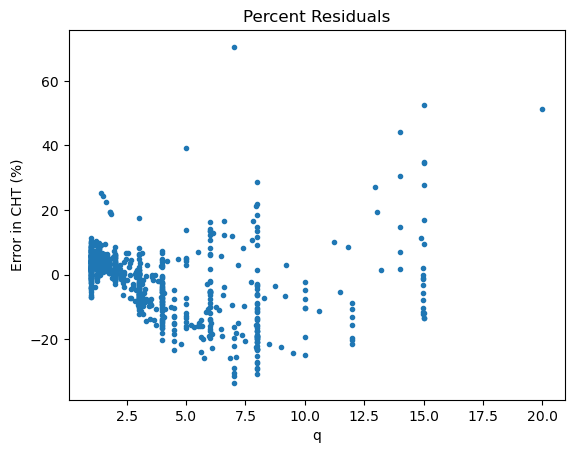

/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250703_142300_1TcEDe/hall_of_fame.csv


[ Info: Started!


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.987e-05  0.000e+00  y = 3213.4
3           2.194e-05  2.986e-01  y = x₀ * 10.679
4           1.239e-05  5.718e-01  y = square(x₀ * -0.17747)
6           1.179e-05  2.459e-02  y = square((x₁ + x₀) * -0.17747)
7           4.833e-06  8.920e-01  y = cube(x₀) * (cbrt(x₁) * 6.6221e-05)
8           4.339e-06  1.079e-01  y = (x₀ * x₁) + (cube(x₀) * 6.4963e-05)
10          3.177e-06  1.559e-01  y = (cube(x₀) * 6.5599e-05) + (x₀ * (x₁ + x₂))
11          2.978e-06  6.440e-02  y = (cube(x₀) * 6.5599e-05) + (x₀ * (x₁ + cbrt(x₂)))
12          2.125e-06  3.378e-01  y = (cube(x₀) * 6.3502e-05) + (x₀ * (x₁ * (x₂ + 1.2229)))
14          2.121e-06  8.493e-04  y = ((cube(x₀) * 6.3493e-05) + ((x₀ * x₁) * (x₂ + 1.2263))...
                                      ) - x₁
16          1.856e-06  6.664e-02  y = (cube(x₀) * 6.3898e-05) + (x₀ * (x₃ + (x₁ + (x₁ *

[ Info: Final population:
[ Info: Results saved to:


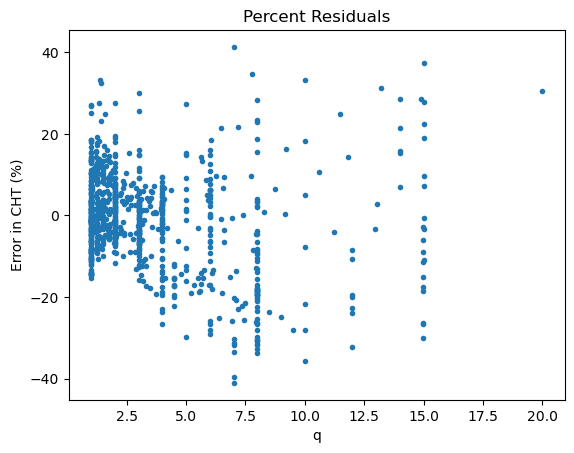

/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250703_142306_4FgH4u/hall_of_fame.csv

Expressions evaluated per second: 1.810e+05
Progress: 887 / 900 total iterations (98.556%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.987e-05  0.000e+00  y = 3213.3
3           2.194e-05  2.986e-01  y = x₀ * 10.679
4           1.239e-05  5.718e-01  y = square(x₀ * 0.17736)
5           1.227e-05  9.466e-03  y = cube(sqrt(x₀ + -104.71))
6           1.036e-05  1.690e-01  y = square((x₀ * 0.17736) + x₁)
8           7.610e-06  1.544e-01  y = square((x₀ * -0.21895) + (17.447 - x₁))
9           7.258e-06  4.730e-02  y = cube(sqrt(((x₁ * 10.815) + -125.97) + x₀))
10          4.183e-06  5.511e-01  y = square(cube(sqrt(x₀) * -0.20108) + (x₁ * -2.736))
12          2.364e-06  2.854e-01  y = square((x₁ * -3.0435) + cube(-0.20086 * (x₂ 

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:


Current Prediction Average Error (%): 5.90180609847121
Best Prediction Average Error (%): 100
Current Model Formula: (0.010414174*x0*x1 + x2 + 0.0075836987*sqrt((x0 + x2*(x1 + sqrt(x0*x1)))**3) + 2.3296418)**2


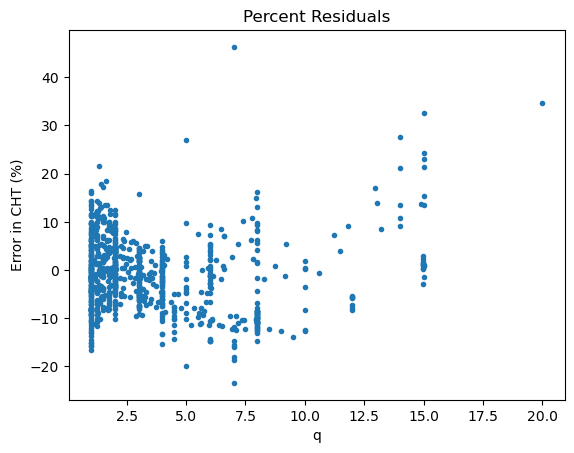

/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250703_142312_ulS7RC/hall_of_fame.csv


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:



Expressions evaluated per second: 1.560e+05
Progress: 867 / 900 total iterations (96.333%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.987e-05  0.000e+00  y = 3213.3
3           2.194e-05  2.986e-01  y = x₀ * 10.679
4           1.239e-05  5.718e-01  y = square(x₀ * 0.17736)
5           1.227e-05  9.466e-03  y = cube(sqrt(x₀ + -104.72))
6           9.473e-06  2.588e-01  y = square(x₁ + (x₀ * 0.17031))
8           7.607e-06  1.097e-01  y = (x₁ + sqrt(x₀)) * (x₀ + -164.8)
9           6.758e-06  1.183e-01  y = sqrt(cube(x₁) + x₀) * (x₀ + -164.8)
10          3.795e-06  5.770e-01  y = x₀ * ((x₂ - (-6.0045e-05 * square(x₀))) + x₁)
12          3.795e-06  5.066e-07  y = x₀ * ((x₂ - (-6.0045e-05 * square(x₀ - -6.0045e-05))) ...
                                      + x₁)
14          2

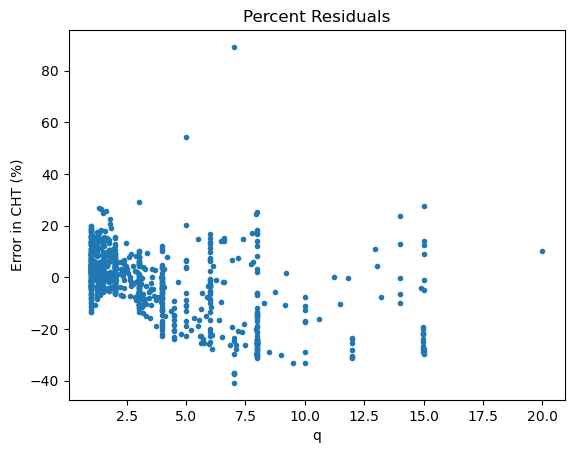

/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250703_142319_BbOopw/hall_of_fame.csv


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:



Expressions evaluated per second: 1.360e+05
Progress: 741 / 900 total iterations (82.333%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.987e-05  0.000e+00  y = 3213.3
3           2.194e-05  2.986e-01  y = x₀ * 10.679
4           1.239e-05  5.718e-01  y = square(x₀) * 0.031459
5           1.227e-05  9.466e-03  y = sqrt(cube(x₀ + -104.72))
6           9.474e-06  2.587e-01  y = square((x₀ * -0.17053) - x₁)
7           8.553e-06  1.022e-01  y = square((square(x₁) + x₀) * 0.17086)
8           8.096e-06  5.492e-02  y = (cbrt(x₁) * -21.356) * (203.61 - x₀)
9           8.072e-06  3.048e-03  y = square((square(x₂ + x₁) + x₀) * 0.17135)
10          4.994e-06  4.801e-01  y = (cbrt(x₁) * ((145.98 - x₀) * -0.041823)) * x₀
11          4.857e-06  2.782e-02  y = (((167.42 - x₀) * -0.046809) 

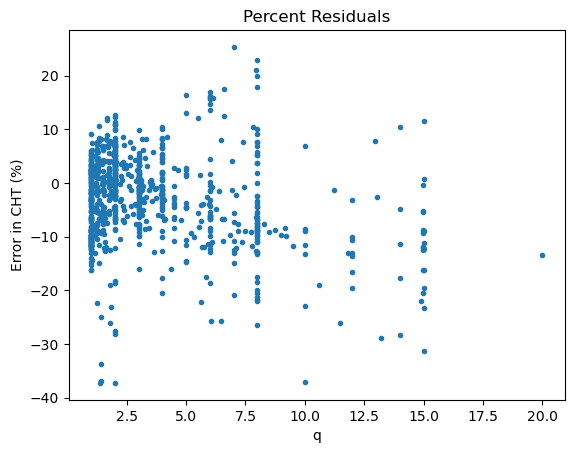

  - outputs/20250703_142325_BFcqHv/hall_of_fame.csv


In [12]:

#Here, I am fitting my model simply to the common horizon times found by the numerical simulations. We do not use the difference from the Newtonian model
#We are also using regular mass ratio, not symmetric mass ratio, as the parameter in our model and in what is plotted.
init_param = np.column_stack((ref_orb_period, df_7["reference_mass_ratio"], df_7["reference_dimensionless_spin1_z"], df_7["reference_dimensionless_spin2_z"]))
num = 10

for i in range(num):

    model.fit(init_param, CHT, weights = CHT)
    CHT_pred = model.predict(init_param)
    current_avg_error = 100*np.sqrt(np.power((CHT_pred - CHT)/CHT, 2)).mean() 
    
    print("Current Prediction Average Error (%):", current_avg_error)
    print("Best Prediction Average Error (%):", best_avg_error)
    print("Current Model Formula:", model.sympy())

    plt.scatter(df_7["reference_mass_ratio"], 100*(CHT_pred - CHT)/CHT, marker = ".", label = "PySR")
    plt.xlabel("q")
    plt.ylabel("Error in CHT (%)")
    plt.title("Percent Residuals")
    plt.show()
    plt.close()

    '''
    if current_avg_error < best_avg_error:
        best_avg_error = current_avg_error
        best_model = model.equations_
        plt.savefig(f"best_model_{round(best_avg_error, 3)}.png")
        with open(f'best_model_{round(best_avg_error, 3)}.pk', 'wb') as best_model_file: #We create a pickle file called 'best_model.pk' that we want to write into and call it best_model_file
            pickle.dump(model, best_model_file) #We write the current state of the model to the pickle file created above
    elif current_avg_error < 1.5*best_avg_error:
        plt.savefig(f"good_model_{round(current_avg_error, 3)}.png")
        with open(f'good_model_{round(current_avg_error, 3)}.pk', 'wb') as good_model_file:
            pickle.dump(model, good_model_file)
            
    '''

/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.987e-05  0.000e+00  y = 3213.3
3           2.194e-05  2.986e-01  y = x₀ * 10.68
4           1.239e-05  5.718e-01  y = square(x₀ * 0.17737)
6           1.108e-05  5.586e-02  y = cube((x₀ * 0.03506) + 3.2092)
8           7.858e-06  1.717e-01  y = cube(x₀ * 0.04339) + inv(cube(x₁))
9           4.275e-06  6.087e-01  y = cube((0.036852 * x₀) + (inv(x₁) * 0.50013))
11          2.430e-06  2.826e-01  y = cube(((x₀ * 0.037613) + x₂) + (inv(x₁) * 0.46474))
13          1.603e-06  2.079e-01  y = cube(x₂ + ((inv(1.3416 + (3.6844 * x₁)) * x₀) * 0.0924...
                                      74))
14          1.480e-06  7.996e-02  y = cube(cbrt(x₂) + ((inv((x₁ * 5.9604) + 2.1147) * 0.1467...
                                      3) * x₀))
15          1.210e-06  2.018e-01  y = cube(x₂ + ((x₂ + (x₀ * 0.092474)) * inv((3.6844 * x₁) ...
             

[ Info: Final population:
[ Info: Results saved to:


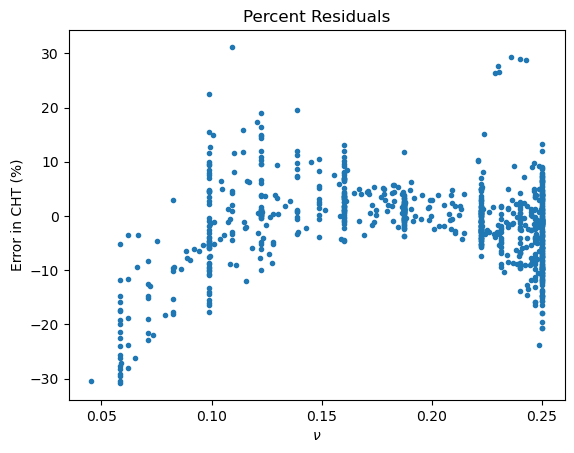

/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!


  - outputs/20250703_142332_StQbWp/hall_of_fame.csv

Expressions evaluated per second: 1.560e+05
Progress: 828 / 900 total iterations (92.000%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.987e-05  0.000e+00  y = 3213.3
3           2.194e-05  2.986e-01  y = x₀ * 10.679
4           1.239e-05  5.718e-01  y = square(x₀ * 0.17737)
6           1.191e-05  1.963e-02  y = square(x₀ + -20.401) * 0.035412
8           1.108e-05  3.622e-02  y = ((x₀ * 3.7142e-05) + 0.017568) * square(x₀)
10          8.015e-06  1.619e-01  y = square((x₀ * (0.27179 - (x₁ * 0.45287))) - x₁)
14          5.633e-06  8.817e-02  y = (square((x₀ + square(inv(x₁))) + x₀) * 0.013113) + (x₀...
                                       * -9.2178)
15          5.069e-06  1.054e-01  y = (x₀ * -10.724) + (square(x₀ + (x₀ + (

[ Info: Final population:
[ Info: Results saved to:


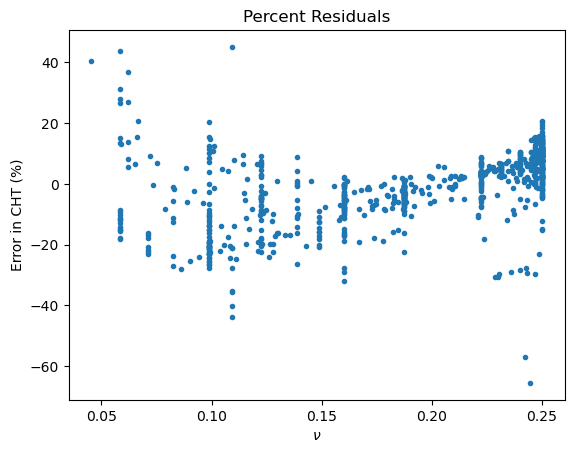

/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250703_142338_jPry5Y/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.987e-05  0.000e+00  y = 3213.1
3           2.194e-05  2.986e-01  y = x₀ * 10.679
4           1.239e-05  5.718e-01  y = square(x₀ * 0.17735)
5           1.227e-05  9.467e-03  y = sqrt(cube(x₀ + -104.71))
6           1.151e-05  6.387e-02  y = cube(x₀ + 42.717) * 6.0687e-05
7           1.143e-05  7.138e-03  y = cube(sqrt(-104.57 + x₀) + x₂)
8           1.127e-05  1.382e-02  y = x₀ + (cube(x₀ + 33.278) * 5.8867e-05)
9           9.577e-06  1.631e-01  y = (6.0687e-05 * cube(x₀)) + (inv(x₁) * x₀)
10          6.177e-06  4.384e-01  y = cube((inv(square(x₁)) + x₀) + x₀) * 9.2766e-06
11          4.824e-06  2.473e-01  y = (cube(inv(x₁ * 0.1017) + x₀) - -0.0041504) * 5.9089e-0...
                                      5
14          3.983e-06  6.386e-02  y = cube((x₀ + square((x₂ - -4.303) + inv

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:


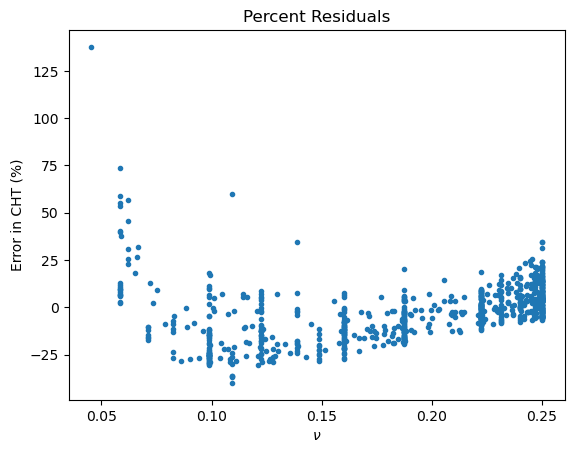

/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250703_142344_QGtywD/hall_of_fame.csv


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:



Expressions evaluated per second: 1.490e+05
Progress: 830 / 900 total iterations (92.222%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.987e-05  0.000e+00  y = 3213.3
3           2.194e-05  2.986e-01  y = x₀ * 10.68
4           1.239e-05  5.718e-01  y = square(x₀) * 0.03146
5           1.227e-05  9.466e-03  y = cube(sqrt(x₀ - 104.72))
6           1.114e-05  9.697e-02  y = cube((x₀ * 0.036774) + 2.5655)
8           7.440e-06  2.017e-01  y = cube(sqrt(inv(x₁)) + (x₀ * 0.03783))
10          6.055e-06  1.030e-01  y = cube(x₂ + (sqrt(inv(x₁)) + (x₀ * 0.038013)))
11          5.522e-06  9.198e-02  y = ((x₀ * 0.058701) * x₀) - ((x₁ * x₀) * 46.613)
13          4.130e-06  1.453e-01  y = (((x₀ * 0.058917) + x₂) * x₀) - (x₁ * (x₀ * 46.614))
14          3.849e-06  7.041e-02  y = (((0.0590

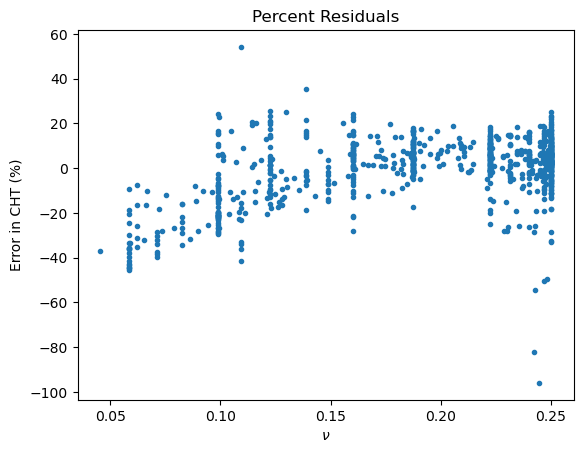

/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250703_142351_n7SitR/hall_of_fame.csv


[ Info: Started!



Expressions evaluated per second: 1.540e+05
Progress: 834 / 900 total iterations (92.667%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.987e-05  0.000e+00  y = 3213.3
3           2.194e-05  2.986e-01  y = x₀ * 10.679
4           1.239e-05  5.718e-01  y = square(x₀ * 0.17737)
6           1.157e-05  3.428e-02  y = square((x₀ * 0.19961) + -8.0007)
8           7.566e-06  2.122e-01  y = square((0.25236 - (x₁ * 0.35581)) * x₀)
10          6.684e-06  6.197e-02  y = square((((0.66364 - x₁) * x₀) * 0.41943) - 4.9096)
11          6.600e-06  1.269e-02  y = square((((0.66373 - x₁) * x₀) * 0.42243) - square(-2.5...
                                      348))
12          5.970e-06  1.003e-01  y = square(5.8497 - (x₂ + (x₀ * ((0.79005 - x₁) * 0.33653)...
                                    

[ Info: Final population:
[ Info: Results saved to:


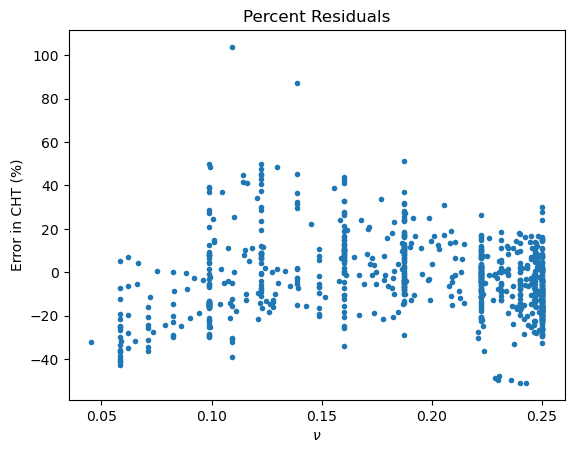

/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250703_142357_CsqFDi/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.987e-05  0.000e+00  y = 3214
3           2.194e-05  2.986e-01  y = x₀ * 10.679
4           1.239e-05  5.718e-01  y = square(x₀ * 0.17736)
5           1.227e-05  9.466e-03  y = cube(sqrt(x₀ + -104.72))
6           1.138e-05  7.542e-02  y = square(14.49 - (x₀ * 0.2175))
8           1.102e-05  1.599e-02  y = square(x₂ + ((x₀ * 0.21795) - 14.567))
9           6.754e-06  4.898e-01  y = cube((1.3031 - x₁) * sqrt(x₀ + -142.2))
11          4.995e-06  1.508e-01  y = cube((1.3103 - x₁) * (x₂ + sqrt(x₀ + -142.2)))
13          3.105e-06  2.378e-01  y = cube(((0.70362 - x₁) * (x₂ + sqrt(x₀ + -180.97))) * 2....
                                      4483)
15          2.348e-06  1.397e-01  y = cube((((1.7704 - x₁) - x₁) * (x₂ + sqrt(x₀ + -105))) -...
                                       5.6193)

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:


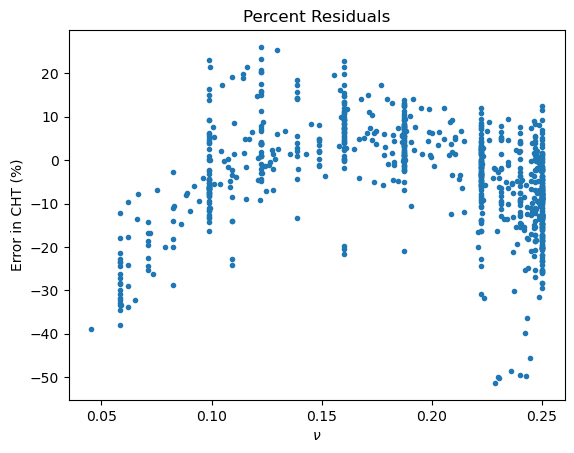

/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!


  - outputs/20250703_142403_nc6wQE/hall_of_fame.csv

Expressions evaluated per second: 1.600e+05
Progress: 872 / 900 total iterations (96.889%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.987e-05  0.000e+00  y = 3213
3           2.194e-05  2.986e-01  y = x₀ * 10.679
4           1.239e-05  5.718e-01  y = square(x₀ * 0.17737)
5           1.227e-05  9.466e-03  y = sqrt(cube(x₀ + -104.72))
6           1.139e-05  7.476e-02  y = square(13.363 - (x₀ * 0.21497))
8           1.117e-05  9.657e-03  y = square(((x₀ * 0.21497) - 13.363) + x₃)
9           1.037e-05  7.443e-02  y = square(square(cbrt(square(x₂ + (0.06234 * x₀)))))
10          7.661e-06  3.026e-01  y = square(square(square(cbrt(x₀ * 0.058569))) + inv(x₁))
11          6.798e-06  1.195e-01  y = square(square(cbrt(square(inv(x₁

[ Info: Final population:
[ Info: Results saved to:


Current Prediction Average Error (%): 12.416709160323975
Best Prediction Average Error (%): 100
Current Model Formula: ((x2 - 1.5717582)**3 + 0.0253970949118834*Abs(x0**2)**(2/3)*sign(x0**2)**2 - 6.858104 + 2/x1)**2


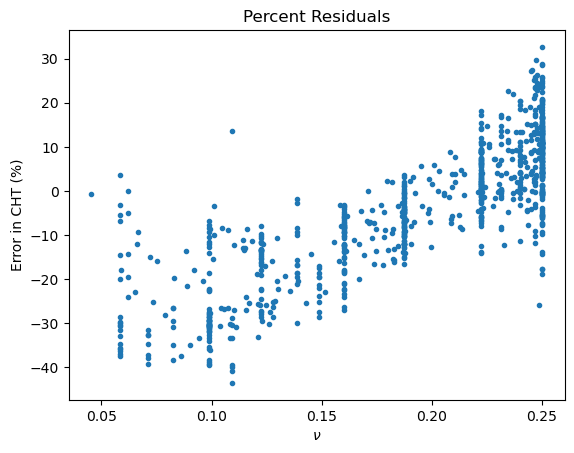

/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!


  - outputs/20250703_142409_csWwF2/hall_of_fame.csv

Expressions evaluated per second: 1.650e+05
Progress: 857 / 900 total iterations (95.222%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.987e-05  0.000e+00  y = 3213.3
3           2.194e-05  2.986e-01  y = x₀ * 10.679
4           1.239e-05  5.718e-01  y = square(x₀ * -0.17737)
5           1.228e-05  8.818e-03  y = cube(sqrt(x₀ + -103.47))
6           1.141e-05  7.302e-02  y = square((56.596 - x₀) * 0.20958)
8           4.842e-06  4.288e-01  y = square((x₀ * 0.26462) - (x₁ * 153.12))
10          4.269e-06  6.293e-02  y = square(((x₁ * 153.72) - x₂) - (x₀ * 0.26577))
11          4.096e-06  4.137e-02  y = square(((x₁ * 153.72) - cbrt(x₂)) - (x₀ * 0.26536))
12          3.754e-06  8.726e-02  y = square(((153.72 * x₁) - (x₂ + x₂)) 

[ Info: Final population:
[ Info: Results saved to:


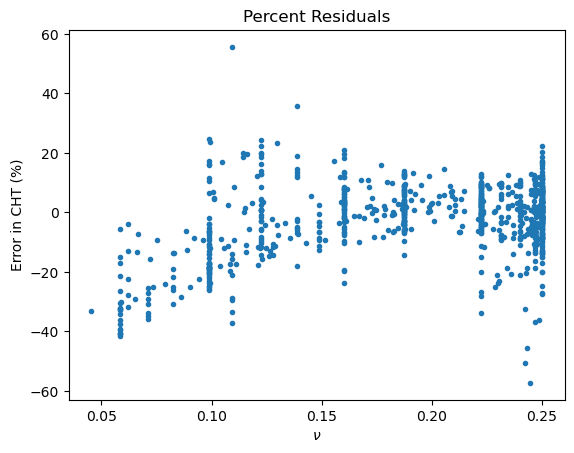

/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250703_142416_Kw4DlT/hall_of_fame.csv
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.987e-05  0.000e+00  y = 3213.3
3           2.194e-05  2.986e-01  y = x₀ * 10.679
4           1.239e-05  5.718e-01  y = square(x₀ * 0.17736)
6           1.138e-05  4.235e-02  y = square((x₀ * 0.21853) + -14.78)
8           4.808e-06  4.308e-01  y = square((x₁ * 145.86) - (x₀ * 0.26075))
10          4.242e-06  6.268e-02  y = square((x₁ * 145.86) - (x₂ + (x₀ * 0.26081)))
11          4.124e-06  2.805e-02  y = square((x₁ * 157.76) - (cbrt(x₂) + (x₀ * 0.26754)))
12          2.173e-06  6.409e-01  y = square(((x₀ * 0.27709) - (176.21 * x₁)) + (x₂ * 9.487)...
                                      )
14          1.919e-06  6.216e-02  y = square((x₃ + ((x₀ * 0.27967) - (x₁ * 176.21))) + (x₂ *...
                                       9.487))
16          1.873e-06  1.201e-02  y = square(x₃ + (

[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:


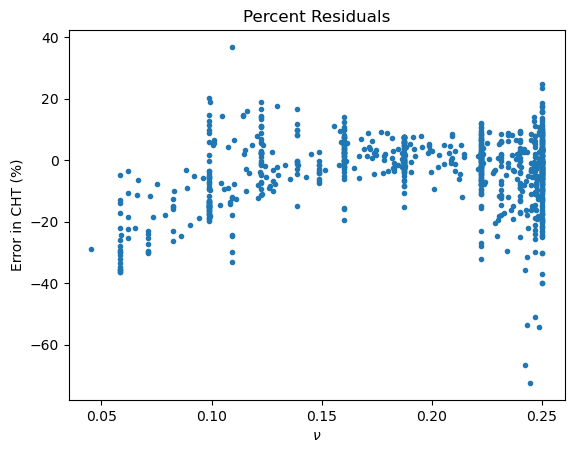

/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2217: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/home/ajt6830/.local/share/mamba/envs/pysr_env/lib/python3.11/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


  - outputs/20250703_142422_3qERTE/hall_of_fame.csv


[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:



Expressions evaluated per second: 1.360e+05
Progress: 781 / 900 total iterations (86.778%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           3.987e-05  0.000e+00  y = 3213.3
3           2.194e-05  2.986e-01  y = x₀ * 10.679
5           1.239e-05  2.859e-01  y = (x₀ * 0.031457) * x₀
6           1.217e-05  1.808e-02  y = sqrt(x₀) * (x₀ + -143.65)
7           1.140e-05  6.458e-02  y = x₀ * ((x₀ * 0.044178) + -4.5669)
9           5.505e-06  3.642e-01  y = ((x₁ * -43.798) + (0.057048 * x₀)) * x₀
11          4.131e-06  1.436e-01  y = x₀ * (((x₁ * -46.965) + x₂) + (x₀ * 0.059122))
12          3.845e-06  7.177e-02  y = x₀ * ((x₁ * -48.04) + ((x₀ * 0.059719) + cbrt(x₂)))
13          3.041e-06  2.345e-01  y = (((x₀ * 0.060851) + (x₁ * -49.673)) + (x₂ * 2.6229)) *...
                          

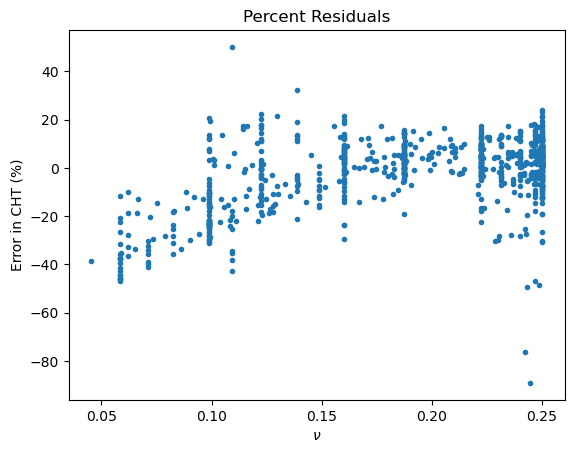

  - outputs/20250703_142428_NOHqMb/hall_of_fame.csv


In [13]:
#Here, I am fitting my model simply to the common horizon times found by the numerical simulations. We do not use the difference from the Newtonian model
#Here, I replace regular mass ratio with the symmetric mass ratio as a varying parameter in my model
init_param = np.column_stack((ref_orb_period, nu(df_7["reference_mass_ratio"]), df_7["reference_dimensionless_spin1_z"], df_7["reference_dimensionless_spin2_z"]))
num = 10

for i in range(num):

    model.fit(init_param, CHT, weights = CHT)
    CHT_pred = model.predict(init_param)
    current_avg_error = 100*np.sqrt(np.power((CHT_pred - CHT)/CHT, 2)).mean() 
    
    print("Current Prediction Average Error (%):", current_avg_error)
    print("Best Prediction Average Error (%):", best_avg_error)
    print("Current Model Formula:", model.sympy())

    plt.scatter(nu(df_7["reference_mass_ratio"]), 100*(CHT_pred - CHT)/CHT, marker = ".", label = "PySR")
    plt.xlabel(r"$\nu$")
    plt.ylabel("Error in CHT (%)")
    plt.title("Percent Residuals")
    plt.show()
    plt.close()

    '''
    if current_avg_error < best_avg_error:
        best_avg_error = current_avg_error
        best_model = model.equations_
        plt.savefig(f"best_model_{round(best_avg_error, 3)}.png")
        with open(f'best_model_{round(best_avg_error, 3)}.pk', 'wb') as best_model_file: #We create a pickle file called 'best_model.pk' that we want to write into and call it best_model_file
            pickle.dump(model, best_model_file) #We write the current state of the model to the pickle file created above
    elif current_avg_error < 1.5*best_avg_error:
        plt.savefig(f"good_model_{round(current_avg_error, 3)}.png")
        with open(f'good_model_{round(current_avg_error, 3)}.pk', 'wb') as good_model_file:
            pickle.dump(model, good_model_file)
            
    '''

In [15]:
with open("best_model_0.446.pk", 'rb') as file: #Open the saved model file and store that data under the name 'file'
    loaded_model = pickle.load(file) #Use Pickle module to load data into usable format and put that into loaded_model variable

loaded_model.sympy()

#\sqrt{\frac{13.21 \tau^\frac{3}{2}}{q} - 13.21q^2(656.67 - 0.03 \tau^2}

sqrt(13.208489*x0**(3/2)/x1 - 13.208489*x1**2*(656.6745 - 0.033914566*x0**2))

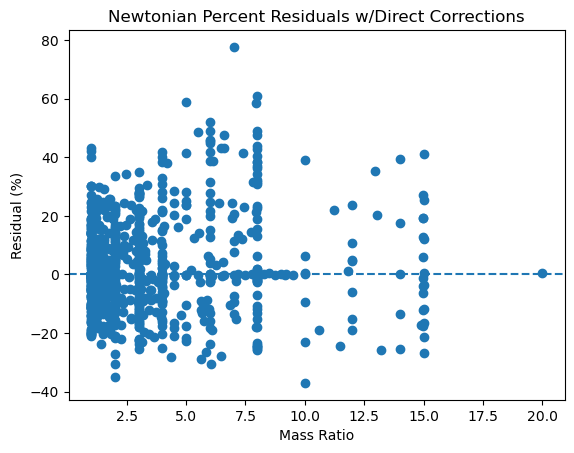

In [16]:
direct_corrections = loaded_model.predict(init_param)

plt.scatter(df_7["reference_mass_ratio"], 100*(Newtonian_CHT([ref_orb_period, df_7["reference_mass_ratio"]]) - direct_corrections - CHT)/CHT)
plt.axhline(0, linestyle = '--')
plt.xlabel("Mass Ratio")
plt.ylabel("Residual (%)")
plt.title("Newtonian Percent Residuals w/Direct Corrections")
plt.savefig(r"Newtonian_Percent_Residuals_with_Direct_Corrections.png")
#I suppose it makes sense that my model fitted to non-spinning black hole mergers doesn't do very well when I test it on black holes with nonzero spin